# Primeiros passos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Exemplo de texto para treinar o modelo dos garotos
n = ['te ligo mais tarde',
     'me liga depois',
     'estou a caminho',
     'me avisa hoje',
     'que horas a call']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Transformar testo para matrizes
vect = CountVectorizer()

In [5]:
# Aprendendo o vocabulario dos garotos
vect.fit(n)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
# Examinar o vocabulário treinado
vect.get_feature_names()

['avisa',
 'call',
 'caminho',
 'depois',
 'estou',
 'hoje',
 'horas',
 'liga',
 'ligo',
 'mais',
 'me',
 'que',
 'tarde',
 'te']

In [0]:
# Tranformar em uma matriz de termo 
ndtm = vect.transform(n)

In [10]:
ndtm

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [11]:
# Transformar a matriz esparsa em densa
ndtm.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

In [13]:
# Observe o vocabulario e os termos da matriz juntos
pd.DataFrame(ndtm.toarray(), columns=vect.get_feature_names())

,avisa,call,caminho,depois,estou,hoje,horas,liga,ligo,mais,me,que,tarde,te
0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [14]:
# Veja o tipo da matriz dos termos
type(ndtm)

scipy.sparse.csr.csr_matrix

In [15]:
# Olhar o conteudo da matriz sparsa
print(ndtm)

  (0, 8)	1
  (0, 9)	1
  (0, 12)	1
  (0, 13)	1
  (1, 3)	1
  (1, 7)	1
  (1, 10)	1
  (2, 2)	1
  (2, 4)	1
  (3, 0)	1
  (3, 5)	1
  (3, 10)	1
  (4, 1)	1
  (4, 6)	1
  (4, 11)	1


In [0]:
# Frase teste
m = ['que horas me liga hoje']

In [0]:
# Fazer a predição
mdtm = vect.transform(m)

In [19]:
mdtm.toarray()

array([[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0]])

In [20]:
pd.DataFrame(mdtm.toarray(), columns=vect.get_feature_names())

,avisa,call,caminho,depois,estou,hoje,horas,liga,ligo,mais,me,que,tarde,te
0,0,0,0,0,0,1,1,1,0,0,1,1,0,0


# LECON tweet disaster

In [0]:
# Ler os dados
tttr = pd.read_csv("train.csv", encoding='latin-1')
tttt = pd.read_csv("test.csv", encoding='latin-1')

In [22]:
tttr.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
tttr = tttr[['text', 'target']]
tttr.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
tttr.isnull().sum()

text      0
target    0
dtype: int64

In [28]:
tttr.target = tttr.target.astype(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [29]:
tttr.describe()

,text,target
count,7613,7613
unique,7503,2
top,11-Year-Old Boy Charged With Manslaughter of T...,0
freq,10,4342


In [30]:
tttr['tt_len'] = tttr.text.apply(len)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
tttr.head()

,text,target,tt_len
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


Text(0.5, 0, 'Txt Length')

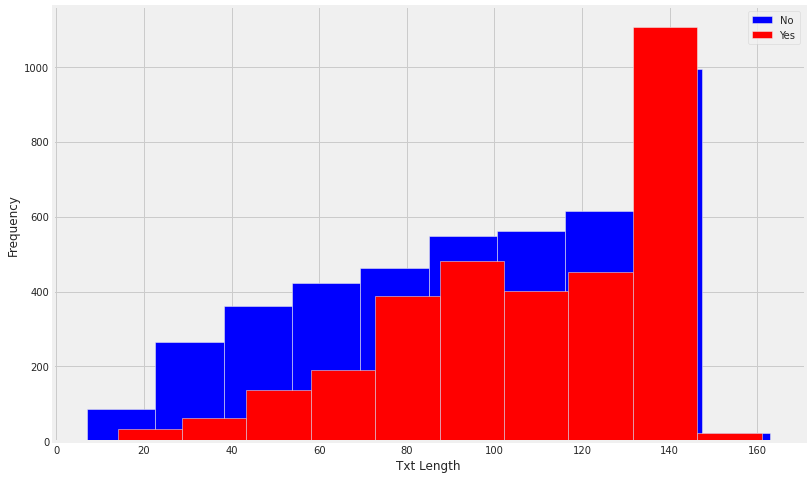

In [42]:
plt.figure(figsize=(12, 8))

tttr[tttr.target=='0'].tt_len.plot(bins=10, kind='hist', 
                                          color='blue', 
                                          label='No')
tttr[tttr.target=='1'].tt_len.plot(kind='hist', color='red', 
                                           label='Yes')
plt.legend()
plt.xlabel("Txt Length")

In [48]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [0]:
tttr['clean_tt'] = tttr.text.apply(text_process)

In [51]:
tttr['clean_tt']

0            Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo Ruby Alaska smoke wildfires pou...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609    ariaahrary TheTawniest control wild fires Cali...
7610    M194 0104 UTC5km Volcano Hawaii httptcozDtoyd8EbJ
7611    Police investigating ebike collided car Little...
7612    Latest Homes Razed Northern California Wildfir...
Name: clean_tt, Length: 7613, dtype: object

In [52]:
type(stopwords.words('english'))

list

In [53]:
# Vamos contar as palavras e colocar elas em minusculo
from collections import Counter

words = tttr[tttr.target=='0'].clean_tt.apply(lambda x: [word.lower() for word in x.split()])
no_tt_words = Counter()

for tw in words:
    no_tt_words.update(tw)
    
print(no_tt_words.most_common(50))

[('like', 253), ('amp', 192), ('new', 168), ('get', 163), ('one', 128), ('body', 112), ('via', 99), ('would', 97), ('video', 96), ('people', 91), ('love', 89), ('know', 85), ('back', 84), ('time', 83), ('us', 83), ('got', 83), ('see', 82), ('cant', 81), ('emergency', 81), ('full', 81), ('day', 78), ('youtube', 76), ('going', 75), ('still', 72), ('fire', 72), ('go', 67), ('want', 67), ('good', 67), ('think', 66), ('3', 64), ('man', 62), ('world', 62), ('lol', 61), ('rt', 60), ('life', 60), ('youre', 58), ('first', 58), ('news', 57), ('last', 56), ('burning', 56), ('really', 55), ('way', 55), ('need', 55), ('make', 54), ('work', 54), ('best', 53), ('let', 52), ('much', 51), ('many', 51), ('even', 51)]


In [54]:
words = tttr[tttr.target=='1'].clean_tt.apply(lambda x: [word.lower() for word in x.split()])
disas_words = Counter()

for tw in words:
    disas_words.update(tw)
    
print(disas_words.most_common(50))

AttributeError: ignored